# Assignment #2
## MACS 30000, Dr. Evans
### Submitted by: Nipun Thakurele

**Question 1**

**1.a** 
For imputing age and gender variables into the BestIncome.txt data, we will use linear regression model on SurveyIncome.txt data. We will run a regression of age on total income and weight. Using the linear relationship obtained from regression, we will impute age variable into the BestIncome.txt data. Similarly, we will run a regression of female variable on total income and weight to obtain the linear relationship between them. Using the same relationship, we will impute the female variable into the BestIncome.txt data. Imputing female variable will automatically cater to requirement of imputing the gender variable.

age = 2.52e-05*tot_inc - 0.0067*wgt + 44.2097
female = -5.25e-06*tot_inc - 0.0195*wgt + 3.7611 
(Note: these are female probabilities. If their value is >= 0 then gender is coded as female (1), else it is coded as male (0).
where tot_inc is total income (dollars), wgt is weight (lbs.)



In [132]:
import pandas as pd
import statsmodels.api as sm

bf = pd.read_csv(r'C:\Users\Nipun\persp-analysis_A18\Assignments\A2\BestIncome.txt', index_col = 0, header = None).reset_index()
bf.columns = ['lab_inc', 'cap_inc', 'hgt', 'wgt']

sf = pd.read_csv(r'C:\Users\Nipun\persp-analysis_A18\Assignments\A2\SurvIncome.txt', index_col = 0, header = None).reset_index()
sf.columns = ['tot_inc', 'wgt', 'age', 'female']

outcome_1  = 'age'
features = ['tot_inc', 'wgt']

x, y= sf[features], sf[outcome_1]
x_vars = x[['tot_inc', 'wgt']]


x_vars = sm.add_constant(x_vars, prepend=False)
x_vars.head()
m = sm.OLS(y, x_vars)
res = m.fit()
#print(res.summary())

ols_sf = pd.concat([y, x], axis=1)
#ols_sf.head()

In [141]:
outcome_2  = 'female'
z= sf[outcome_2]
n = sm.OLS(z, x_vars)
res = n.fit()
#print(res.summary())

ols_sf = pd.concat([z, x], axis=1)
#ols_sf.head()

**1.b** Imputing age into BestIncome.txt data

In [134]:
def get_age(row):
    
    lab_inc = row[0]
    cap_inc = row[1]
    wgt = row[3]
    tot_inc = lab_inc + cap_inc
    age = (2.52e-05*tot_inc) - (0.0067*wgt) + 44.2097
    return age


bf['imputed_age'] = bf.apply(get_age, axis = 1)
#bf.head()

Imputing gender into BestIncome.txt data
Note: 1 denotes female while 0 denotes male

In [135]:
def get_gender(row):
    
    lab_inc = row[0]
    cap_inc = row[1]
    wgt = row[3]
    tot_inc = lab_inc + cap_inc
    female = (-5.25e-06*tot_inc) - (0.0195*wgt) + 3.7611
    if female >= 0.5:
        return 1
    return 0


bf['imputed_female'] = bf.apply(get_gender, axis = 1)
#bf.head()


**1.c**

In [136]:
bf['imputed_age'].describe()[['count','mean','std','min','max']];

Summary data of imputed age variable:
count    10000.000000
mean        44.894036
std          0.219066
min         43.980016
max         45.706849

In [137]:
bf['imputed_female'].describe()[['count','mean','std','min','max']];

Summary data of gender(female) variable:
count    10000.000000
mean         0.470500
std          0.499154
min          0.000000
max          1.000000
    

In [ ]:
**Part d** Correlation Matrix



In [138]:
bf.corr();


<img src="Correlation.PNG">

# Question 2

In [158]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
gf = pd.read_csv(r'C:\Users\Nipun\persp-analysis_A18\Assignments\A2\IncomeIntel.txt', index_col = 0, header = None).reset_index()
gf.shape
gf.columns = ['grad_year', 'gre_qnt', 'salary_p4']
gf.head()
#gf.describe()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [175]:
outcome  = 'salary_p4'
features = ['gre_qnt']
x, y = gf[features], gf[outcome]
x_vars = x[['gre_qnt']]
x_vars.head()
x_vars = sm.add_constant(x_vars, prepend=False)
x_vars.head()
m = sm.OLS(y, x_vars)
res = m.fit()
print(res.summary())
ols_gf = pd.concat([y, x], axis=1)
ols_gf.head()


                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        13:17:03   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

,salary_p4,gre_qnt
0,67400.475185,739.737072
1,67600.584142,721.811673
2,58704.880589,736.277908
3,64707.290345,770.498485
4,51737.324165,735.002861


|       |  coef  | std err |
|-------|--------|---------|
|gre_qnt|-25.7632| 1.365   |
| const |8.95e+04| 878.764 |

In [ ]:
**2.b**

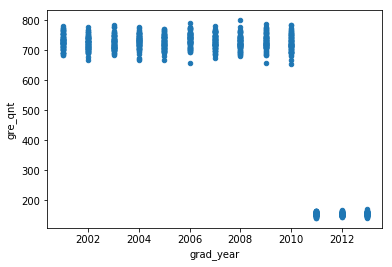

In [153]:
# Make scatterplot of graduation year on gre quant
# simple scatterplot using matplotlib
grad_yr = gf['grad_year']
gre_quant = gf['gre_qnt']
gf.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

In [ ]:
The above scatterplot points towards a non-linear relationship between gre_qnt and grad_year variables which violates the
assumptions of linear regression. This is possibly because of the two different scales to measure gre_qnt scores. Prior to 2011, 
gre_qnt was from 200-800, after which it is 130-170 range. We propose rescaling of the old scores:
    new_score = (old_score - 200)*(1/15) + 130 

In [162]:
def get_newscores(row):
    
    if row[0] < 2011:
        return (row[1] - 200)*(1/15) + 130 
    return row[1]

gf['adjusted_scores'] = gf.apply(get_newscores, axis = 1)
gf.head()

,grad_year,gre_qnt,salary_p4,adjusted_scores
0,2001.0,739.737072,67400.475185,165.982471
1,2001.0,721.811673,67600.584142,164.787445
2,2001.0,736.277908,58704.880589,165.751861
3,2001.0,770.498485,64707.290345,168.033232
4,2001.0,735.002861,51737.324165,165.666857


In [ ]:
**2.c**

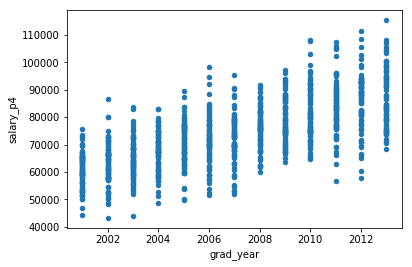

In [163]:
# Make scatterplot of graduation year on salary_p4
# simple scatterplot using matplotlib
grad_yr = gf['grad_year']
salary_p4 = gf['salary_p4']
gf.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

In [ ]:
The above scatterplot violates the assumption of linear regression, as there is autocorrelation in the data. The salaries
have been changing across years, and we propose 

In [172]:
avg_inc_by_year = gf['salary_p4'].groupby(gf['grad_year']).mean().values
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

def get_growth(row):
    return row[2]/((1 + avg_growth_rate) ** (row[0] - 2001))

gf['adjusted_salary'] = gf.apply(get_growth, axis = 1)
gf.head()

,grad_year,gre_qnt,salary_p4,adjusted_scores,adjusted_salary
0,2001.0,739.737072,67400.475185,165.982471,67400.475185
1,2001.0,721.811673,67600.584142,164.787445,67600.584142
2,2001.0,736.277908,58704.880589,165.751861,58704.880589
3,2001.0,770.498485,64707.290345,168.033232,64707.290345
4,2001.0,735.002861,51737.324165,165.666857,51737.324165


In [ ]:
**2.d**

In [176]:
outcome  = 'adjusted_salary'
features = ['adjusted_scores']
x, y = gf[features], gf[outcome]
x_vars = x[['adjusted_scores']]
x_vars.head()
x_vars = sm.add_constant(x_vars, prepend=False)
x_vars.head()
m = sm.OLS(y, x_vars)
res = m.fit()
print(res.summary())
ols_gf = pd.concat([y, x], axis=1)
#ols_gf.head()

                            OLS Regression Results                            
Dep. Variable:        adjusted_salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05257
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.819
Time:                        21:13:13   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
adjusted_scores    -9.9681     43.474     

|                 |   coef  |  std err |
|-----------------|---------|----------|
| adjusted_scores | -9.9681 |  43.474  |
|      const      |6.304e+04| 7083.395 |

In [ ]:
The coefficient have changed and also the accompanying standard errors have increased a lot. The variables are not statistically
significant, p - value > 0.05, hence the null hypothesis that "higher intelligence is not associated with higher income" 
is not true. Hence, we reject the null hypothesis. 

In [ ]:
**Question 3**

In [ ]:
**3.a** The research question of the paper is, "On what grounds, then, do individuals selectively make or break some tie
over others, and how do these choices shed light on the observation that similar people are more likely to become acquainted
than dissimilar people?"

In [ ]:
**3.b**
The research paper used a network dataset comprising 30396 undergraduate and graduate students, faculty, and staff,
in a large university community who used their university e-mail accounts to both send and receive messages during an academic
year. They recorded the network interactions in real time along with individual attributes and features of the 
relevant organizational structure. The dataset comprised of interaction, affiliation, and attribute-type longitudinal data,
and was constructed by merging three different databases: 
    (1) the logs of e-mail interactions within the university over one academic year, 
    (2) a database of individual attributes (status, gender, age, department, number of years in the community, etc.), and
    (3) records of course registration, in which courses were recorded separately for each semester.

The population of 30,396 selected individuals was a mix of undergraduate students (21%), graduate and professional students (27%),
faculty members (13%), administrators and staff (13.4%), and finally “affiliates” (25%), a category that included postdoctoral 
researchers, visiting scholars, exchange students, and recent alumni. For each e-mail message sent within the university 
community, they obtained the time stamp (in minutes since the start of data collection), the sender ID, and the IDs of all 
recipients of the message, extracted from the mail server logs and were appropriately anonymized without deleting the content.  

The number of observations reduced after cleaning the data by only including messages sent only to a single recipient to 
ensure that the data represented interpersonal communication. The resulting data set comprised 7,156,162 messages 
exchanged by 30,396 stable e-mail users during 270 days of observation. The full dataset spanned two calendar years, or six
academic semesters though the analysis in the article report only one academic year’s worth of data.

The definitions and descriptions of all variables are included in Appendix A.

In [ ]:
**3.c**
As a part of data cleaning, the researchers included only the email accounts which were on the central university server.
But, as they note, a number of persons also used departmental email accounts such as xyz@department.university.edu
(mostly the faculty and graduate students in departments such as computer science, mathematics, and physics). They left them out
from the dataset as they couldnot match them with employee records.
By not considering the departmental email accounts, they missed on a relevant portion of university network community. There
could have been significant number of email exchanges on these email accounts, which could reduce the strength of their claim.
Hence, the scope of their analysis got reduced in comparison to what the original scope of research could have been.



In [ ]:
**3.d**
To understand the origins of homophily, researchers need many tie formation events, which are rare in their dataset.
The authors tackle this problem by employing the case-control sampling methodology (King and Zeng 2001, 2002). 
For each type of transition, and for each daily network snapshot, the authors determine the appropriate “risk sets” of 
pairs of nodes that could experience the transition (for tie formation, all pairs not currently connected; 
for tie dissolution, all current ties). Then they sampled a total of about 100,000 cases (pairs that actually experienced
the transition) over the 210-day period as well as twice that number of controls (pairs from the risk set that did not 
experience the transition of interest—e.g., for the dissolution example, ties that did not dissolve). Using the case-control
weights, allowed the researchers to compute transition probabilities and fit logistic regression
models efficiently (King and Zeng 2002).